# RnB Soul Lyrics

In [1]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np

import matplotlib as plt

In [2]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
my_rapid_api_key = os.getenv("RAPID_API_KEY")

In [3]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [4]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [5]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'SOUL_RNB'
limit_songs = 50
country = 'US'

querystring = {"country_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

In [6]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

The number of songs retrieved is : 50


,Track Name,Artists
TrackIDs,,
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic"
158832749,Idfc,Blackbear
510700753,Save Your Tears,The Weeknd
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d
579903331,Take My Breath,The Weeknd


In [7]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

In [8]:
artists_df

,No. Songs in Top Chart
Artists,
The Weeknd,4
"Bruno Mars, Anderson .Paak & Silk Sonic",2
Doja Cat,2
GIVĒON,2
"Earth, Wind & Fire",2
SZA,1
"Yung Bleu, Chris Brown & 2 Chainz",1
The Weeknd & Ariana Grande,1
"Lipps, Inc.",1


<AxesSubplot:title={'center':'RNB Artists on Top Chart'}, xlabel='Artists'>

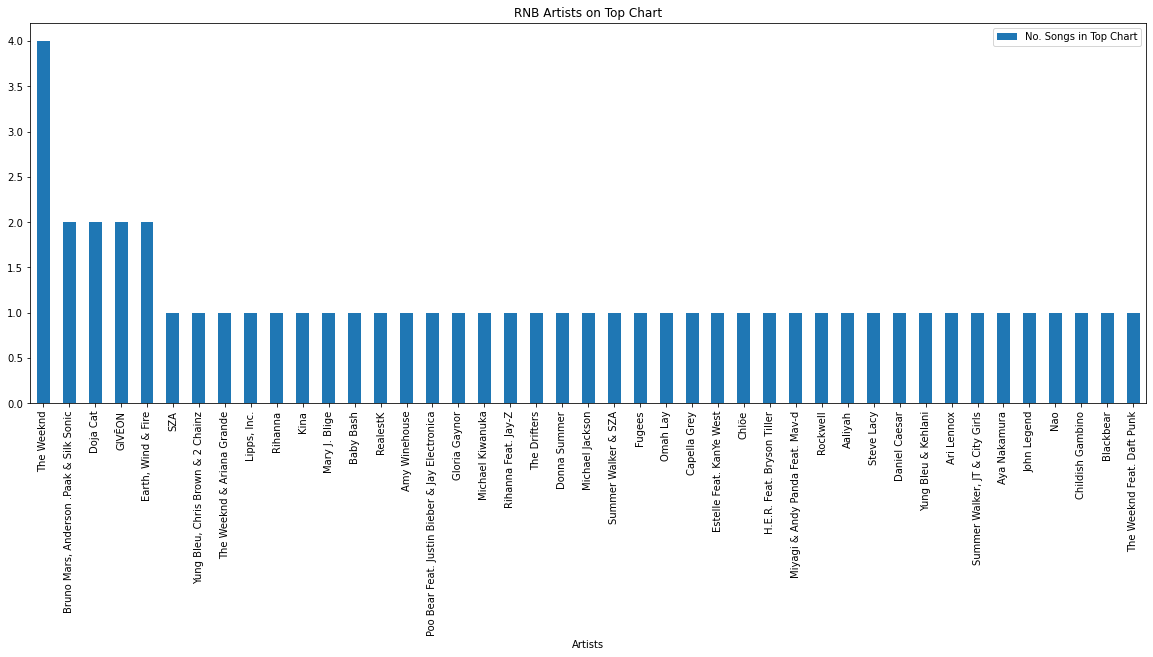

In [9]:
artists_df.plot.bar(figsize =(20, 7), title = 'RNB Artists on Top Chart')

In [10]:
# Retrieve Lyrics for all TrackIDs

track_ids  # the list created in "Search for top songs in Genre" section is required

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  # Note: tracks with a type != "LYRICS" don't contain lyrics
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [11]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d,Для тебя найду добро и верну ему пульс Вновь к...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...


In [12]:
lyrics_df 

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d,Для тебя найду добро и верну ему пульс Вновь к...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev..."
578449926,Have Mercy,Chlöe,"Murda on the beat, so it's not nice Booty so b..."


In [13]:
lyrics_df.describe()

,Track Name,Artists,Lyrics
count,50,50,50
unique,50,43,50
top,Smokin Out The Window,The Weeknd,"Wait a minute, this love started out so tender..."
freq,1,4,1


In [14]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [
        '591295396', '585090484', '437075280'
    ]
)
new_lyrics_df

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev..."
578449926,Have Mercy,Chlöe,"Murda on the beat, so it's not nice Booty so b..."
502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...


In [15]:
new_lyrics_df.describe()

,Track Name,Artists,Lyrics
count,47,47,47
unique,47,41,47
top,Smokin Out The Window,The Weeknd,"Wait a minute, this love started out so tender..."
freq,1,4,1


# Tokenizer
In this section, I will use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [44]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'doo', 'ca', 'nt', 'ay', 'wan', 'wo', 'ta', 'oh', 'ohoh', 'cause', 'fuckin', 'fuck', 'shit', 'nigga']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [45]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."


In [46]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
587835563,"Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
158832749,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
510700753,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
579903331,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
433417422,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."
582361274,"I be so sick of you niggas, y'all contradictin...","[sick, nigga, yall, contradicting, bored, come..."
503576063,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,..."
412210310,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,..."
578449926,"Murda on the beat, so it's not nice Booty so b...","[murda, beat, nice, booty, big, work, lord, me..."
502331040,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah..."


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.


In [47]:
from collections import Counter
from nltk import ngrams

In [48]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(10)))

{('feel', 'coming'): 61, ('coming', 'babe'): 32, ('feel', 'love'): 28, ('take', 'funkytown'): 28, ('music', 'music'): 28, ('coming', 'feel'): 28, ('babe', 'feel'): 28, ('feel', 'like'): 27, ('please', 'stop'): 25, ('reason', 'though'): 23}


In [49]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [50]:
# Use token_count to get the top 10 words from hip hop rap lyrics
lyrics_top_10 = token_count(lyrics_processed)
lyrics_top_10

[('like', 201),
 ('feel', 167),
 ('get', 119),
 ('love', 117),
 ('take', 109),
 ('got', 108),
 ('know', 108),
 ('baby', 94),
 ('let', 85),
 ('yeah', 79)]

# Word Clouds
In this section, I generate word clouds hip hop rap lyrics

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'RnB Lyrics')

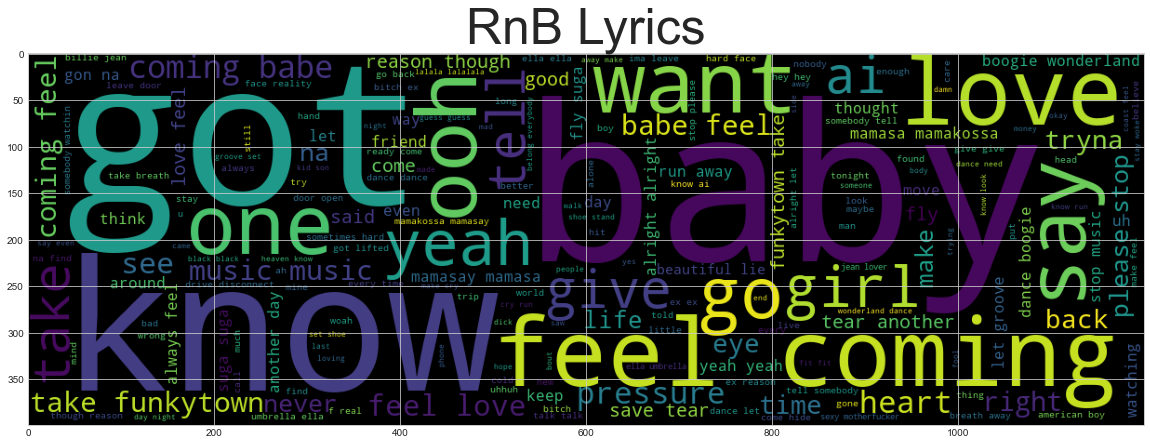

In [52]:
# Generate the Bitcoin word cloud
lyrics_words_joined = ' '.join(lyrics_processed)
wc = WordCloud(width=1200, height=400).generate(lyrics_words_joined)
plt.imshow(wc)
plt.title('RnB Lyrics', fontdict={'fontsize':50}, loc='Center')